In [14]:
import torch
x = torch.ones(3, 2)
z_q = torch.ones(3, 2)

In [15]:
x[:, 0] = 1
x[:, 1] = 1

z_q[:, 0] = 1
z_q[:, 1] = 0.5

In [16]:
x,z_q

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([[1.0000, 0.5000],
         [1.0000, 0.5000],
         [1.0000, 0.5000]]))

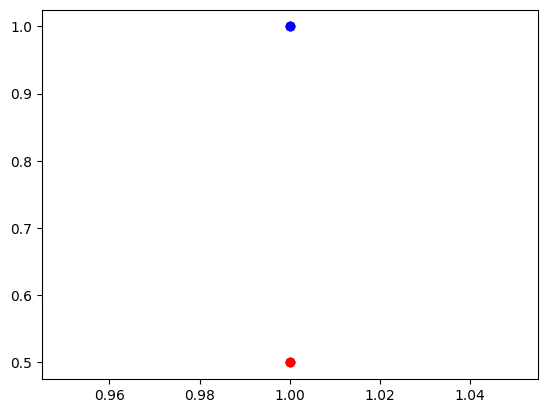

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0].numpy(), x[:, 1].numpy(), label='x', color='blue')
plt.scatter(z_q[:, 0].numpy(), z_q[:, 1].numpy(), label='z_q', color='red')

In [18]:
def get_very_efficient_rotation(u, q, e):
    w = ((u + q) / torch.norm(u + q, dim=1, keepdim=True)).detach()
    e = e - 2 * torch.bmm(torch.bmm(e, w.unsqueeze(-1)), w.unsqueeze(1)) \
        + 2 * torch.bmm(torch.bmm(e, u.unsqueeze(-1).detach()), q.unsqueeze(1).detach())
    return e

In [19]:
get_very_efficient_rotation(x / (torch.norm(x, dim=1, keepdim=True) + 1e-6),
                            z_q / (torch.norm(z_q, dim=1, keepdim=True) + 1e-6),
                            x.unsqueeze(1)).squeeze()

tensor([[1.2649, 0.6325],
        [1.2649, 0.6325],
        [1.2649, 0.6325]])

In [20]:
import torch.nn.functional as F 
x = F.normalize(x, dim=1)
z_q = F.normalize(z_q, dim=1)

get_very_efficient_rotation(x / (torch.norm(x, dim=1, keepdim=True) + 1e-6),
                            z_q / (torch.norm(z_q, dim=1, keepdim=True) + 1e-6),
                            x.unsqueeze(1)).squeeze()

tensor([[0.8944, 0.4472],
        [0.8944, 0.4472],
        [0.8944, 0.4472]])

In [21]:
z_q

tensor([[0.8944, 0.4472],
        [0.8944, 0.4472],
        [0.8944, 0.4472]])

In [22]:
x

tensor([[0.7071, 0.7071],
        [0.7071, 0.7071],
        [0.7071, 0.7071]])

In [23]:
theta = torch.sum(x * z_q, dim=1) # (batch*time)

In [26]:
theta

tensor([0.9487, 0.9487, 0.9487])

In [27]:
theta[0] = -0.001

In [33]:
theta

tensor([-0.0010,  0.9487,  0.9487])

In [39]:
neg_ind = theta < 0
neg_ind = neg_ind.float()
neg_ind

tensor([1., 0., 0.])

In [40]:
pos_ind = theta > 0
pos_ind = pos_ind.float()
pos_ind

tensor([0., 1., 1.])

In [42]:
theta*neg_ind + theta*pos_ind

tensor([-0.0010,  0.9487,  0.9487])